<a href="https://colab.research.google.com/github/Rheartscoding/Fall24-Data-Science-Bootcamp-HW/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv('data/Spotify dataset_Updated.csv')  # Replace with the actual file name

# Explore dataset structure
print("Dataset Head:\n", spotify_data.head())
print("\nDataset Info:\n")
spotify_data.info()
print("\nDataset Description:\n", spotify_data.describe())

Dataset Head:
    valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  duration_s  energy  explicit                      id  \
0       831667     831.667   0.211         0  4BJqT0PrAfrxzMOxytFOIz   
1       180533     180.533   0.341         0  7xPhfUan2yNtyFG0cUWkt8   
2       500062     500.062   0.166         0  1o6I8BglA6ylDMrIELygv1   
3       210000     210.000   0.309         0  3ftBPsC5vPBKxYSee08FDH   

In [ ]:
# Handle missing values
spotify_data = spotify_data.dropna()

# Remove duplicates
spotify_data = spotify_data.drop_duplicates()

# Verify cleaning
print("\nCleaned Dataset Info:")
spotify_data.info()



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   duration_s        170653 non-null  float64
 7   energy            170653 non-null  float64
 8   explicit          170653 non-null  int64  
 9   id                170653 non-null  object 
 10  instrumentalness  170653 non-null  float64
 11  key               170653 non-null  int64  
 12  liveness          170653 non-null  float64
 13  loudness          170653 non-null  float64
 14  mode              170653 non-null  int64  
 15  name              170653 non-null  object 
 1

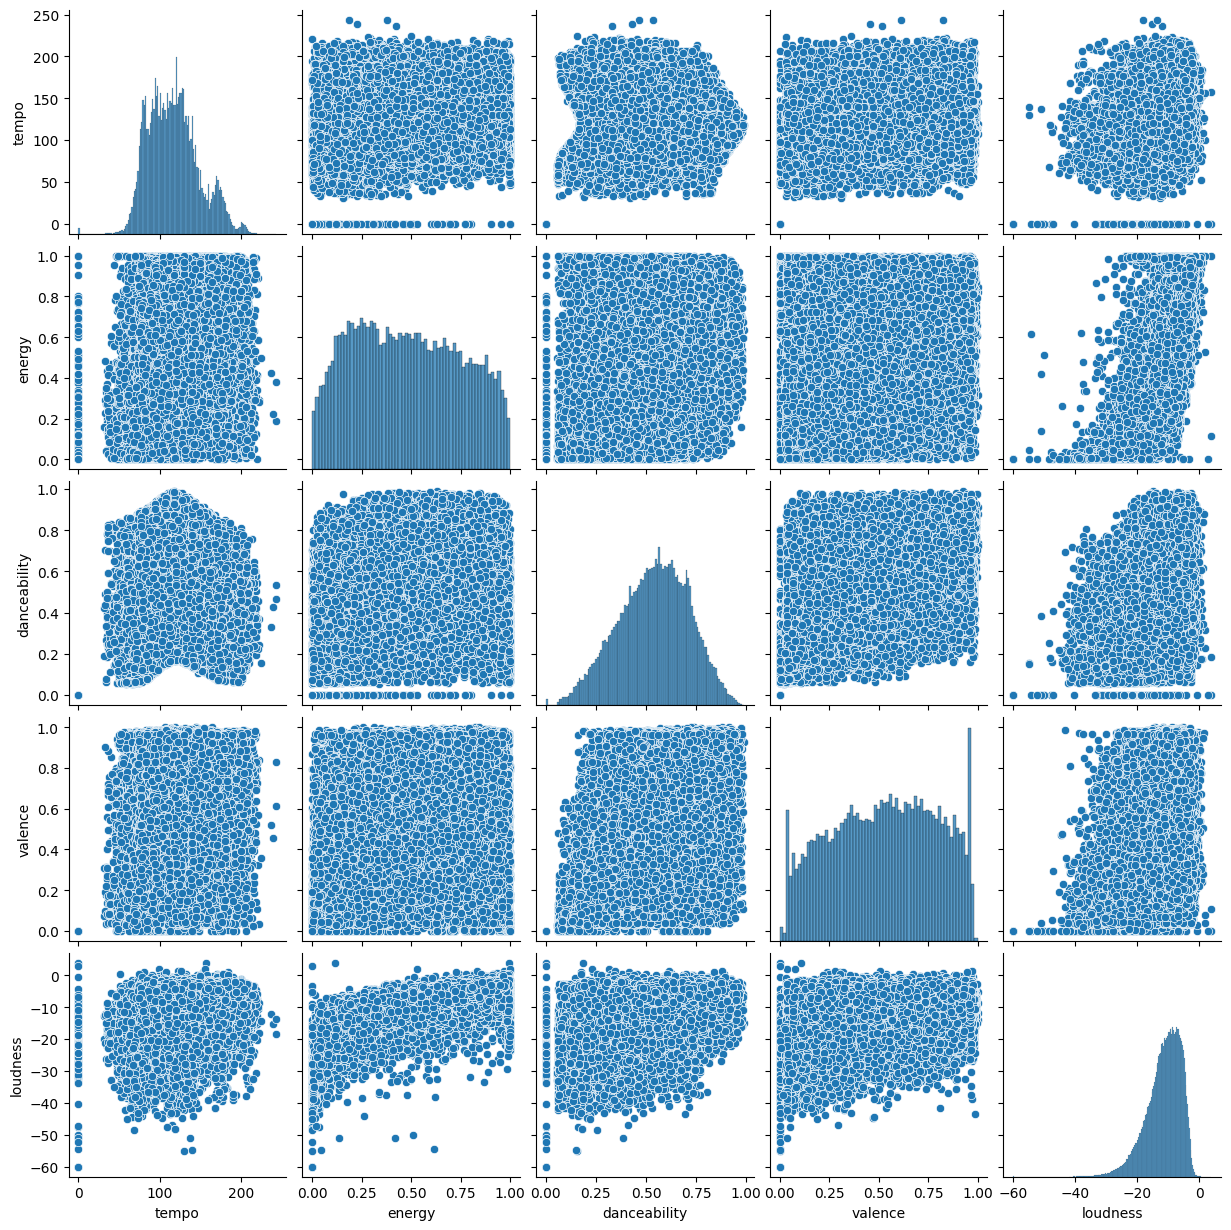

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select audio features
audio_features = ['tempo', 'energy', 'danceability', 'valence', 'loudness']

# Pairplot to analyze relationships
sns.pairplot(spotify_data[audio_features])
plt.show()

# Correlation heatmap
#plt.figure(figsize=(10, 6))
#sns.heatmap(spotify_data[audio_features].corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Between Audio Features')
#plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity matrix
features = spotify_data[audio_features]
similarity_matrix = cosine_similarity(features)

# Content-Based Recommendation Function
def recommend_content_based(song_name, data, n_recommendations=5):
    song_idx = data[data['track_name'] == song_name].index[0]
    similarity_scores = list(enumerate(similarity_matrix[song_idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:n_recommendations+1]
    recommendations = [(data.iloc[i[0]]['track_name'], data.iloc[i[0]]['artist_name']) for i in sorted_scores]
    return recommendations

# Test content-based recommendation
#print("\nContent-Based Recommendations for 'Shape of You':\n", recommend_content_based('Shape of You', spotify_data))



: 